In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import os
os.chdir('C:/Users/raja/Documents/retaildataset')

In [4]:
data = pd.read_csv('Retail_Data.csv')

In [5]:
data

,customer_id,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015,First_Transaction,Latest_Transaction
0,CS2945,153.0,516.0,173.0,1029.0,40.0,2.0,7.0,3.0,13.0,1.0,18-May-11,08-Mar-15
1,CS4074,269.0,429.0,737.0,1027.0,NaN,3.0,6.0,10.0,15.0,NaN,29-May-11,05-Dec-14
2,CS4798,153.0,536.0,414.0,1001.0,47.0,2.0,7.0,6.0,11.0,1.0,01-Jul-11,21-Feb-15
3,CS4424,547.0,380.0,921.0,984.0,101.0,7.0,5.0,13.0,13.0,1.0,25-May-11,19-Jan-15
4,CS5057,290.0,235.0,509.0,974.0,NaN,4.0,4.0,6.0,12.0,NaN,10-Jul-11,02-Dec-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8633,143.0,168.0,122.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,28-Jul-11,14-Nov-13
6885,CS8667,44.0,178.0,85.0,NaN,NaN,1.0,3.0,2.0,NaN,NaN,01-Sep-11,26-Sep-13
6886,CS8740,55.0,218.0,17.0,NaN,NaN,2.0,4.0,1.0,NaN,NaN,30-Oct-11,02-Dec-13
6887,CS8753,126.0,289.0,82.0,NaN,NaN,3.0,6.0,2.0,NaN,NaN,08-Aug-11,08-Mar-13


In [6]:
data.shape

(6889, 13)

In [7]:
data.head()

,customer_id,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015,First_Transaction,Latest_Transaction
0,CS2945,153.0,516.0,173.0,1029.0,40.0,2.0,7.0,3.0,13.0,1.0,18-May-11,08-Mar-15
1,CS4074,269.0,429.0,737.0,1027.0,NaN,3.0,6.0,10.0,15.0,NaN,29-May-11,05-Dec-14
2,CS4798,153.0,536.0,414.0,1001.0,47.0,2.0,7.0,6.0,11.0,1.0,01-Jul-11,21-Feb-15
3,CS4424,547.0,380.0,921.0,984.0,101.0,7.0,5.0,13.0,13.0,1.0,25-May-11,19-Jan-15
4,CS5057,290.0,235.0,509.0,974.0,NaN,4.0,4.0,6.0,12.0,NaN,10-Jul-11,02-Dec-14


In [8]:
data.isnull().sum()

customer_id              0
tran_amount_2011       388
tran_amount_2012        80
tran_amount_2013        85
tran_amount_2014        88
tran_amount_2015      2664
transactions_2011      388
transactions_2012       80
transactions_2013       85
transactions_2014       88
transactions_2015     2664
First_Transaction        0
Latest_Transaction       0
dtype: int64

In [9]:
data.describe()

,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015
count,6501.000000,6809.000000,6804.000000,6801.000000,4225.000000,6501.000000,6809.000000,6804.000000,6801.000000,4225.000000
mean,206.174281,310.853136,314.134039,307.970593,103.000000,3.177665,4.779116,4.835979,4.738421,1.578935
std,128.092642,175.768279,175.743597,170.769072,66.204169,1.697319,2.265040,2.277427,2.192086,0.840771
min,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,104.000000,175.000000,175.000000,175.000000,56.000000,2.000000,3.000000,3.000000,3.000000,1.000000
50%,184.000000,288.000000,293.000000,288.000000,85.000000,3.000000,5.000000,5.000000,5.000000,1.000000
75%,282.000000,426.000000,430.000000,418.000000,136.000000,4.000000,6.000000,6.000000,6.000000,2.000000
max,849.000000,1242.000000,1317.000000,1029.000000,538.000000,11.000000,18.000000,17.000000,15.000000,7.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6889 non-null   object 
 1   tran_amount_2011    6501 non-null   float64
 2   tran_amount_2012    6809 non-null   float64
 3   tran_amount_2013    6804 non-null   float64
 4   tran_amount_2014    6801 non-null   float64
 5   tran_amount_2015    4225 non-null   float64
 6   transactions_2011   6501 non-null   float64
 7   transactions_2012   6809 non-null   float64
 8   transactions_2013   6804 non-null   float64
 9   transactions_2014   6801 non-null   float64
 10  transactions_2015   4225 non-null   float64
 11  First_Transaction   6889 non-null   object 
 12  Latest_Transaction  6889 non-null   object 
dtypes: float64(10), object(3)
memory usage: 699.8+ KB


In [11]:
data.isna().any()

customer_id           False
tran_amount_2011       True
tran_amount_2012       True
tran_amount_2013       True
tran_amount_2014       True
tran_amount_2015       True
transactions_2011      True
transactions_2012      True
transactions_2013      True
transactions_2014      True
transactions_2015      True
First_Transaction     False
Latest_Transaction    False
dtype: bool

In [12]:
data.fillna(206.174281)

,customer_id,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015,First_Transaction,Latest_Transaction
0,CS2945,153.0,516.0,173.0,1029.000000,40.000000,2.0,7.0,3.0,13.000000,1.000000,18-May-11,08-Mar-15
1,CS4074,269.0,429.0,737.0,1027.000000,206.174281,3.0,6.0,10.0,15.000000,206.174281,29-May-11,05-Dec-14
2,CS4798,153.0,536.0,414.0,1001.000000,47.000000,2.0,7.0,6.0,11.000000,1.000000,01-Jul-11,21-Feb-15
3,CS4424,547.0,380.0,921.0,984.000000,101.000000,7.0,5.0,13.0,13.000000,1.000000,25-May-11,19-Jan-15
4,CS5057,290.0,235.0,509.0,974.000000,206.174281,4.0,4.0,6.0,12.000000,206.174281,10-Jul-11,02-Dec-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8633,143.0,168.0,122.0,206.174281,206.174281,4.0,4.0,4.0,206.174281,206.174281,28-Jul-11,14-Nov-13
6885,CS8667,44.0,178.0,85.0,206.174281,206.174281,1.0,3.0,2.0,206.174281,206.174281,01-Sep-11,26-Sep-13
6886,CS8740,55.0,218.0,17.0,206.174281,206.174281,2.0,4.0,1.0,206.174281,206.174281,30-Oct-11,02-Dec-13
6887,CS8753,126.0,289.0,82.0,206.174281,206.174281,3.0,6.0,2.0,206.174281,206.174281,08-Aug-11,08-Mar-13


In [13]:
data

,customer_id,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015,First_Transaction,Latest_Transaction
0,CS2945,153.0,516.0,173.0,1029.0,40.0,2.0,7.0,3.0,13.0,1.0,18-May-11,08-Mar-15
1,CS4074,269.0,429.0,737.0,1027.0,NaN,3.0,6.0,10.0,15.0,NaN,29-May-11,05-Dec-14
2,CS4798,153.0,536.0,414.0,1001.0,47.0,2.0,7.0,6.0,11.0,1.0,01-Jul-11,21-Feb-15
3,CS4424,547.0,380.0,921.0,984.0,101.0,7.0,5.0,13.0,13.0,1.0,25-May-11,19-Jan-15
4,CS5057,290.0,235.0,509.0,974.0,NaN,4.0,4.0,6.0,12.0,NaN,10-Jul-11,02-Dec-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8633,143.0,168.0,122.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,28-Jul-11,14-Nov-13
6885,CS8667,44.0,178.0,85.0,NaN,NaN,1.0,3.0,2.0,NaN,NaN,01-Sep-11,26-Sep-13
6886,CS8740,55.0,218.0,17.0,NaN,NaN,2.0,4.0,1.0,NaN,NaN,30-Oct-11,02-Dec-13
6887,CS8753,126.0,289.0,82.0,NaN,NaN,3.0,6.0,2.0,NaN,NaN,08-Aug-11,08-Mar-13


In [14]:
df=data.dropna()
df

,customer_id,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015,First_Transaction,Latest_Transaction
0,CS2945,153.0,516.0,173.0,1029.0,40.0,2.0,7.0,3.0,13.0,1.0,18-May-11,08-Mar-15
2,CS4798,153.0,536.0,414.0,1001.0,47.0,2.0,7.0,6.0,11.0,1.0,01-Jul-11,21-Feb-15
3,CS4424,547.0,380.0,921.0,984.0,101.0,7.0,5.0,13.0,13.0,1.0,25-May-11,19-Jan-15
5,CS4558,229.0,171.0,378.0,963.0,45.0,3.0,3.0,6.0,12.0,1.0,11-Sep-11,23-Jan-15
9,CS1141,94.0,335.0,313.0,932.0,104.0,2.0,5.0,4.0,13.0,1.0,12-Aug-11,22-Jan-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,CS7132,54.0,250.0,157.0,12.0,69.0,1.0,5.0,4.0,1.0,1.0,13-Jul-11,17-Feb-15
6791,CS8563,119.0,244.0,170.0,12.0,69.0,2.0,5.0,3.0,1.0,1.0,31-May-11,15-Mar-15
6792,CS8527,207.0,289.0,51.0,12.0,61.0,4.0,7.0,2.0,1.0,1.0,07-Sep-11,14-Jan-15
6796,CS8867,105.0,74.0,142.0,10.0,83.0,2.0,2.0,3.0,1.0,2.0,31-May-11,23-Feb-15


<function matplotlib.pyplot.show(close=None, block=None)>

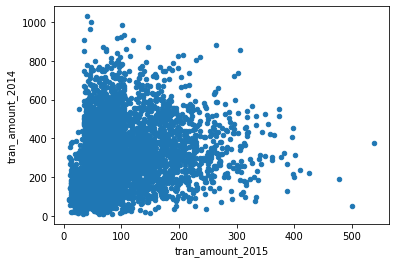

In [15]:
df.plot(kind='scatter', x='tran_amount_2015', y='tran_amount_2014')
plt.show

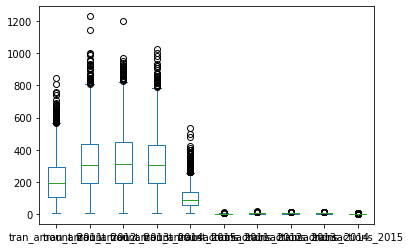

In [16]:
df.plot(kind='box')
plt.show()

In [17]:
df.corr()

,tran_amount_2011,tran_amount_2012,tran_amount_2013,tran_amount_2014,tran_amount_2015,transactions_2011,transactions_2012,transactions_2013,transactions_2014,transactions_2015
tran_amount_2011,1.000000,0.191690,0.191762,0.184938,0.144635,0.937707,0.119100,0.115389,0.109806,0.052859
tran_amount_2012,0.191690,1.000000,0.212220,0.225386,0.171480,0.106843,0.936838,0.119156,0.127952,0.078034
tran_amount_2013,0.191762,0.212220,1.000000,0.234322,0.143903,0.114777,0.126933,0.935928,0.145667,0.041289
tran_amount_2014,0.184938,0.225386,0.234322,1.000000,0.141792,0.108892,0.139204,0.143657,0.930501,0.040518
tran_amount_2015,0.144635,0.171480,0.143903,0.141792,1.000000,0.098019,0.116407,0.080719,0.073767,0.887199
transactions_2011,0.937707,0.106843,0.114777,0.108892,0.098019,1.000000,0.063431,0.068069,0.064862,0.038277
transactions_2012,0.119100,0.936838,0.126933,0.139204,0.116407,0.063431,1.000000,0.065587,0.073928,0.058284
transactions_2013,0.115389,0.119156,0.935928,0.143657,0.080719,0.068069,0.065587,1.000000,0.091908,0.020921
transactions_2014,0.109806,0.127952,0.145667,0.930501,0.073767,0.064862,0.073928,0.091908,1.000000,0.013109
transactions_2015,0.052859,0.078034,0.041289,0.040518,0.887199,0.038277,0.058284,0.020921,0.013109,1.000000


In [18]:
First=pd.DataFrame(df['tran_amount_2015'])
amount=pd.DataFrame(df['tran_amount_2014'])

In [19]:
First

,tran_amount_2015
0,40.0
2,47.0
3,101.0
5,45.0
9,104.0
...,...
6790,69.0
6791,69.0
6792,61.0
6796,83.0


In [20]:
lm= linear_model.LinearRegression()
model =lm.fit(First, amount)

In [21]:
model.coef_

array([[0.35845785]])

In [22]:
model.intercept_

array([282.89755093])

In [23]:
model.score(First,amount)

0.020105093915827044

In [24]:
import numpy as np
First_new = np.array([80])
First_new = First_new.reshape(-1,1)
amount_predict=model.predict(First_new)
amount_predict

C:\Users\raja\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[311.57417858]])

In [25]:
X=([12,22,56])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1,keys=['First_new','amount_predict'])
df

C:\Users\raja\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,First_new,amount_predict
,0,0
0,12,287.199045
1,22,290.783624
2,56,302.971190


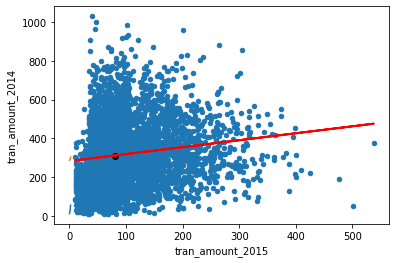

In [26]:
data.plot(kind='scatter', x='tran_amount_2015', y='tran_amount_2014')
plt.plot(First,model.predict(First),color='red', linewidth=2)
plt.scatter(First_new, amount_predict, color='black')
plt.plot(df)
plt.show()